<a href="https://colab.research.google.com/github/k-messick/wrangling/blob/main/completed_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

In [ ]:
! git clone https://github.com/ds4e/wrangling

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [ ]:
#Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/airbnb_hw.csv', low_memory=False)
print(df.shape, '\n')
df.head()

(30478, 13) 



,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


1.

In [ ]:
#Cleaning Price
var='Price'
df[var].str.replace(',', '') #Replace commas with nothing
price = pd.to_numeric(df['Price'],errors='coerce') #Coerce the variable to numeric
print('Total Missings: ', sum(df['Price'].isnull())) #Find how many missing values are there
print(df['Price'].unique() , '\n') #Print Price values

Total Missings:  0
['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1,990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1,000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1,200' '158' '650' '234' '310' '695' '400' '166'
 '119' '62' '168' '340' '479' '43

There are 0 missing values in the Price variable column. When a price goes over 999, it has a comma in it. I fixed that by replacing the commas with nothing.

2.

In [ ]:
df2=pd.read_csv("/content/mn_police_use_of_force.csv", low_memory=False)
print(df2.shape, '\n')
df2.head()

(12925, 13) 



,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [ ]:
#Replacing NA's w/ nan
var2 = 'subject_injury'
print(df2[var2].unique(), '\n')
df2[var2] = df2[var2].replace(' ',np.nan)
print(df2[var2].value_counts(), '\n')


[nan 'No' 'Yes'] 

subject_injury
Yes    1631
No     1446
Name: count, dtype: int64 



In [ ]:
#Checking for missing values
missing_values_for_subject_injury = df2['subject_injury'].isnull().sum()
missing_values_for_subject_injury

total_values_for_subject_injury = len(df2)
total_values_for_subject_injury

missing_proportion = missing_values_for_subject_injury / total_values_for_subject_injury
missing_proportion

0.7619342359767892

About 76% of values are missing. This is of concern, as it is more than half and is a serious issue.

In [ ]:
cross_tab = pd.crosstab(df2['subject_injury'], df2['force_type'])
cross_tab

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal Projectile,Police K9 Bite,Taser
subject_injury,,,,,,,,,
No,0,1093,131,2,33,34,1,2,150
Yes,2,1286,41,0,44,40,2,44,172


It seems that overall when a subject is injured, there are more uses of force, however this isn't true for all subjects. It's important to note that with data missing you don't understand other characteristics such as sex, age, or neighborhood.

3.

In [ ]:
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df3 = pd.read_csv(url,low_memory=False)

In [ ]:
#Clean WhetherDefendantWasReleasedPretrial
pretrial_release = df3['WhetherDefendantWasReleasedPretrial']
print(pretrial_release.unique(),'\n')
print(pretrial_release.value_counts(),'\n')
pretrial_release = pretrial_release.replace(9,np.nan) #9's are "unclear in codebook"
print(pretrial_release.value_counts(),'\n')
sum(pretrial_release.isnull()) #31 missing values
df3['WhetherDefendantWasReleasedPretrial'] = pretrial_release #Replace cleaned values
del pretrial_release

[nan  0.  1.] 

WhetherDefendantWasReleasedPretrial
1.0    19154
0.0     3801
Name: count, dtype: int64 

WhetherDefendantWasReleasedPretrial
1.0    19154
0.0     3801
Name: count, dtype: int64 



4.

In [ ]:
#Clean ImposedSentenceAllChargeInContactEvent
length = df3['ImposedSentenceAllChargeInContactEvent']
object = df3['SentenceTypeAllChargesAtConvictionInContactEvent']

length = pd.to_numeric(length,errors='coerce') #Coerce to numeric
length_NA = length.isnull() #Create a missing dummy
print( np.sum(length_NA),'\n') #Number of missing

print( pd.crosstab(length_NA, object), '\n') #Cases where the charges were dismissed (cat 4)

length = length.mask( object == 4, 0) #Replace length with 0 when type is 4
length = length.mask( object == 9, np.nan) #Replace length with np.nan when type is 9

length_NA = length.isnull() #Create a new missing dummy
print( pd.crosstab(length_NA, type), '\n')
print( np.sum(length_NA),'\n') #Number of missing

df3['ImposedSentenceAllChargeInContactEvent'] = length #Replace data with cleaned
del length, object #Delete temporary variables

274 

SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     4    9
ImposedSentenceAllChargeInContactEvent                                      
False                                             8720  4299  914  8779    0
True                                                 0     0    0     0  274 

col_0                                   <class 'type'>
ImposedSentenceAllChargeInContactEvent                
False                                            22712
True                                               274 

274 



**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

1.

In [ ]:
df4 = pd.read_excel('/content/GSAF5.xls')

In [ ]:
df4.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,...,Bronze whaler,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,...,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2.

In [ ]:
#Drop columns without data
df4 = df4.dropna()

3.

In [ ]:
#Convert to numeric
df4['Year'] = pd.to_numeric(df4['Year'], errors='coerce')

In [ ]:
#Check for missing years
missing_values_for_Year = df4['Year'].isnull().sum()
missing_values_for_Year

0

In [ ]:
#Attacks past 1940
shark_attack = df4[df4['Year'] >= 1940]
shark_attack

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,...,Bronze whaler,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,...,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,1940,1940.0,Unprovoked,NEW GUINEA,Bwagaoia,"Bagalina, North coast Misima Island",NaN,small girl,F,NaN,...,NaN,"A. Bleakley; A. M. Rapson, p.148",1940.00.00.e-small-girl.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.00.00.e,1940.00.00.e,1535.0,NaN,NaN
5456,1940,1940.0,Unprovoked,PAPUA NEW GUINEA,Western Papuan Gulf,Kerema,male,a native,NaN,NaN,...,NaN,"Papuan Villager, 11/1940",1940.00.00.d-Kerema.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.00.00.d,1940.00.00.d,1534.0,NaN,NaN
5457,1940,1940.0,Invalid,SOUTH AFRICA,Eastern Cape Province,Kidd's Beach,Swimming,NaN,NaN,NaN,...,Questionable incident,"D. Davies, p. 102",1940.00.00.c-KiddsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.00.00.c,1940.00.00.c,1533.0,NaN,NaN
5458,1940,1940.0,Invalid,SOUTH AFRICA,KwaZulu-Natal,Winkelspruit,NaN,Indian female,F,NaN,...,Questionable incident,"V.M. Coppleson (1958), p.247; SAF Case #161. U...",1940.00.00.b-IndianFemale.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.00.00.b,1940.00.00.b,1532.0,NaN,NaN


Before focusing on attacks since 1940, the data displayed attacks back to A.D. It seems that overtime, attacks don't have a clear pattern, but often increase for a bit of time and decrease at certain times and this cycle repeats.  

In [ ]:
#Pattern of attacks
attacks_per_year = shark_attack.groupby('Year').size()
attacks_per_year

,0
Year,
1940.0,24
1941.0,27
1942.0,41
1943.0,28
1944.0,31
...,...
2022.0,98
2023.0,109
2024.0,49


It doesn't seem like there's a clear pattern of attacks because there are still some spikes, but recently it seems like attacks are going down.

4.

<ipython-input-128-3d2f2a7a4fcc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_attack['Age'] = pd.to_numeric(shark_attack['Age'], errors='coerce')  # Convert to numeric


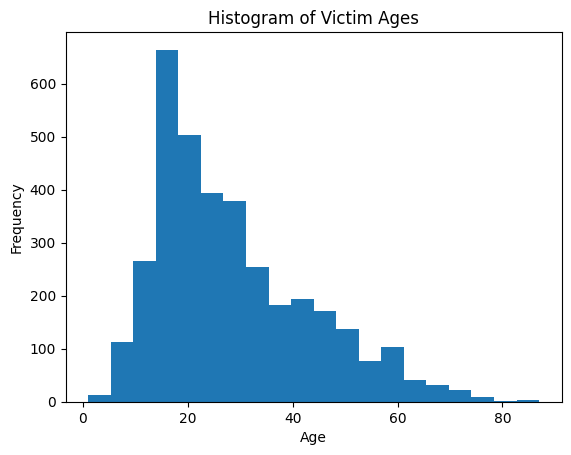

In [ ]:
#Clean the Age variable
shark_attack['Age'] = pd.to_numeric(shark_attack['Age'], errors='coerce')  #Convert to numeric
shark_attack['Age'].dropna().plot(kind='hist', bins=20)
plt.title('Histogram of Victim Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

5.

In [ ]:
#Proportion of male victims
male_victims = shark_attack['Sex'].str.contains('M', na=False).mean()
male_victims

0.787651154268963

The percent of male victims is 78.8%.

6.

In [ ]:
#Clean Type
type = shark_attack['Type'] #Temporary vector of values for the Type variable

type = type.replace(['Sea Disaster', 'Boat','Boating','Watercraft']) #Boating/water accidents
type.value_counts()

type = type.replace(['Invalid', 'Questionable','Unconfirmed','Unverified','Under investigation'],np.nan) #Unclean values
type.value_counts()

shark_attack['Type'] = type #Replace the 'Type' variable with the cleaned version

shark_attack['Type'] = shark_attack['Type'].where(shark_attack['Type'].isin(['Provoked', 'Unprovoked', 'Unknown']))  #Assign Unknown to other values

del type #Destroy temporary vector
shark_attack['Type']

<ipython-input-22-da8ce5451c59>:4: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  type = type.replace(['Sea Disaster', 'Boat','Boating','Watercraft']) #Boating/water accidents
<ipython-input-22-da8ce5451c59>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_attack['Type'] = type #Replace the 'Type' variable with the cleaned version
<ipython-input-22-da8ce5451c59>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

,Type
0,Unprovoked
1,Unprovoked
2,Provoked
3,Unprovoked
4,Unprovoked
...,...
5455,Unprovoked
5456,Unprovoked
5457,Unknown
5458,Unknown


In [ ]:
#Proportion of unprovoked attacks
unprovoked_proportion = (shark_attack['Type'] == 'Unprovoked').mean()
unprovoked_proportion

0.7429461341150605

74.3% of attacks are unprovoked.

7.

In [ ]:
#Clean the Fatal Y/N variable
shark_attack.loc['Fatal Y/N'] = shark_attack['Fatal Y/N'].replace({'N': 'N', 'Y': 'Y'})
shark_attack.loc['Fatal Y/N'] = shark_attack['Fatal Y/N'].where(shark_attack['Fatal Y/N'].isin(['Y', 'N','Unknown']))

8.

It seems sharks are more likely to launch unprovoked attacks on men. The attack is more likely to be fatal if the situation is unprovoked. It is more likely for the attack to be fatal if it is a male victim. I personally am not a fan of sharks.

9.

In [ ]:
shark_attack.loc['Species'] = shark_attack['Species'].str.split()  # Extract the first word of the species column
white_shark_proportion = shark_attack['Species'].str.contains('white', na=True).mean()
white_shark_proportion

0.9998168498168498

It seems that a small number (about 1%) of attacks are by white sharks.

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

Question 3 Answers:
1. According to the abstract, this paper is about data tidying, which is an important component of data cleaning. Tidy datasets are easy to work with and visualize given their specific structure.
2. The "tidy data standard" is intended to accomplish "initial exploration and analysis of the data, and to simplify the development of data analysis tools that work well together". This allows one to focus less on the boring logistics and more on the interest at hand because you don't have to start from scratch each time because there is a standard.
3. The sentence: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way" means that although tidy datasets might have the same structure like the standard family does with adults and children, each family has its own characteristics that make it different than another family. The sentence: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general" shows that defining variables and observations is very context-specific and it is not always clear what is being asked at first, although identifying observations and variables is quite easy. The author suggests that it is easier to describe relationships between variables and to make comparisons between observations.
4. Wickham defines values as either: "numbers (if quantitative) or strings (if qualitative)." A variable contains" "all values that measure the same underlying attribute across units." However, observations contain: "all values measured on the same unit across attributes."
5. In section 2.3, "Tidy Data" is described as a "standard way of mapping the meaning of a dataset to its structure". More specifically, in tidy data, each variable forms a column, each observation forms a row, and each type of observational unit forms a table.
6. The 5 most common problems with messy datasets include (1) column headers are values, not variable names (2) multiple variables are stored in one column (3) variables are stored in both rows and columns (4) multiple types of observational units are stored in the same table and (5) a single observational unit is stored in multiple tables. The data in Table 4 are messy because it contains variables in both the rows and columns and column headers are values, not variable names. Melting a dataset refers to turning columns into rows.
7. Table 11 is messy, but Table 12 is tidy and "molten" because in Table 11 variables are stored in both rows and columns. It has variables in individual columns, spread across columns, and spread across rows. Table 12 however, tidies the data so that there is one variable in each column, and each row represents a day’s observations.
8. The "chicken-and-egg" problem with focusing on tidy data is "if tidy data is only as useful as the tools that work with it, then tidy tools will be inextricably linked to tidy data". Wickham hopes that in the future with further work on the subject of data wrangling, others will continue to develop even better data storage strategies and better tools. Additionally, Wickham also hopes to improve the understanding of the cognitive side of data analysis. Perhaps there could be a construction of tools for dealing with values stored in multidimensional arrays too. Wickham also looks beyond just tidying in terms of data cleaning such as parsing dates and numbers and identifying missing values, and wonders if frameworks can be developed to make these easier.

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?